## Lets Do this Step By STep

### Step 1 : Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_digits 
digits=load_digits()
%matplotlib inline


##### Here From scikit-learn digits are loaded from load_digits(). The digits dataset contains 8x8 pixel images of handwritten digits (0 through 9), and each image is represented as a flattened array of 64 pixels. This dataset is commonly used for digit recognition tasks.

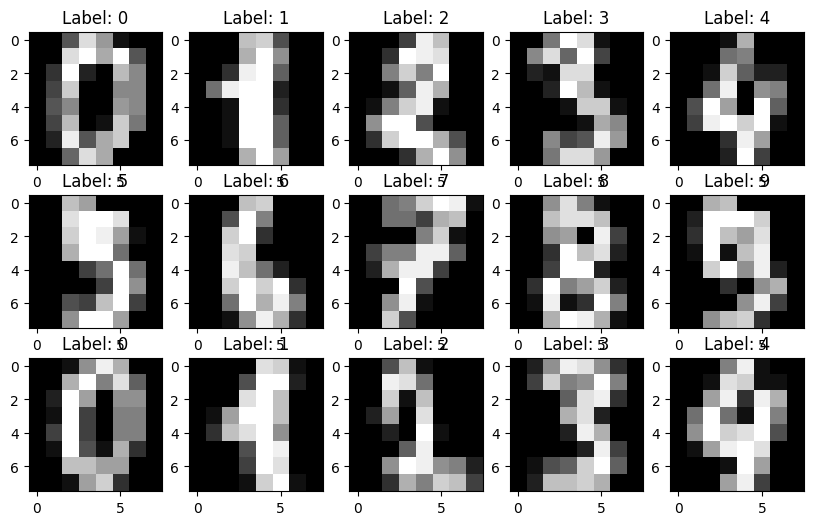

In [4]:
# Lets display the first few images and their labels
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")

plt.show()

### Step 2: Determining the total number of images and labels

In [5]:
print('image Data Shape :',digits.data.shape)
print('Label Data Shape',digits.target.shape)

image Data Shape : (1797, 64)
Label Data Shape (1797,)


Here, 1797 represents the number of images and 64 represents the number of pixels in each image (8*8)

### Step 3: dividing dataset into training and testing set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3,random_state=2)

Some additional data exploration

In [11]:
X_train.shape

(1257, 64)

In [12]:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(540, 64)
(1257,)
(540,)


### Step 4: import logistic regression model from scikit-learn and fit the training data

In [14]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(max_iter=1000)
logr.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [15]:
#lets print predicted target label of the first few data of test set
print(logr.predict(X_test[:10]))

[4 0 9 1 8 7 1 5 1 6]


In [18]:
#lets print all the predictions from test set
y_pred=logr.predict(X_test)
print(y_pred)

[4 0 9 1 8 7 1 5 1 6 6 7 6 2 5 5 9 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 8 4 9 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 8 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 4 0 4 0 0 9 0 6 5 8 8
 3 7 9 2 0 8 2 7 3 0 2 1 9 2 7 0 6 9 3 1 1 3 5 2 5 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 9 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 4 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 3 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8 5 6 1 6 5 2 0 8 2 4 3 3 2 9 3 8 9 8 5 9 0 3 4 7 9 8 5 7 5 0
 5 3 5 0 2 7 3 0 4 3 6 6 1 9 6 3 4 6 4 6 7 2 7 6 3 0 3 0 1 3 6 1 0 4 3 8 4
 3 3 4 8 6 9 6 3 3 0 5 7 

### Step 5: Evaluating the model

In [21]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred,average='weighted')
recall=metrics.recall_score(y_test,y_pred,average='weighted')

print('Accuracy :',accuracy)
print('Precision:',precision)
print('Recall Score :',recall)


Accuracy : 0.9518518518518518
Precision: 0.9537386704141576
Recall Score : 0.9518518518518518


In [22]:
# we can also test accuracy through
score=logr.score(X_test,y_test)
print('Accuracy:',score)

Accuracy: 0.9518518518518518


### Step 6: Representing the Confusion Matrix

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)


[[53  0  0  0  1  0  0  0  0  0]
 [ 0 52  1  0  0  0  0  0  3  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 58  0  2  0  1  1  0]
 [ 0  0  0  0 49  0  0  0  2  2]
 [ 0  0  0  0  1 56  0  0  0  2]
 [ 0  1  0  0  0  0 54  0  1  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  3  0  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  2 40]]


Text(0.5, 1.0, 'Confusion Matrix')

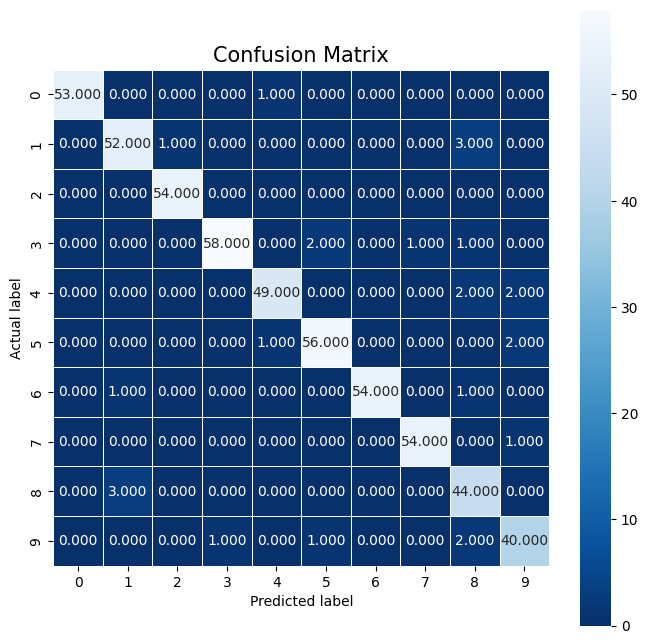

In [29]:
#lets show confusion matrix in form of heatmap using seaborn
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix'
plt.title(all_sample_title,size=15)
